### Import

In [149]:
import pandas as pd
import numpy as np
import sys
import glob
import seaborn as sns
%matplotlib inline

In [2]:
sys.path.insert(0, '../code/')

In [107]:
from loading_routines import *
from preprocessing import *
from feature_engineering import *
from mov_ampl import *
import speed_feature
import split_tasks

### Load data

In [4]:
all_files = glob.glob('../data/behavior_AND_personality_dataset/joints/*.xml')
#print all_files
all_files_new = glob.glob('../data/data_recordings_master/joints/*.xml')

In [5]:
all_sensor_files = glob.glob('../data/behavior_AND_personality_dataset/binary/*.txt')
all_sensor_files_new = glob.glob('../data/data_recordings_master/binary/*.txt')

In [6]:
# remove for now
all_files = [f for f in all_files if not 'subject3' in f]
all_files_new = [f for f in all_files_new if not 'subject21' in f]
all_sensor_files = [f for f in all_sensor_files if not 'subject3' in f]
all_sensor_files_new = [f for f in all_sensor_files_new if not 'subject21' in f]

In [7]:
all_subjects_dfs = [load_df_from_xml(f) for f in all_files+all_files_new]

Loaded 0 tracks for "subject6"
Loaded 1000 tracks for "subject6"
Loaded 2000 tracks for "subject6"
Loaded 3000 tracks for "subject6"
Loaded 4000 tracks for "subject6"
Loaded 5000 tracks for "subject6"
Loaded 6000 tracks for "subject6"
Loaded 7000 tracks for "subject6"
Loaded 8000 tracks for "subject6"
Loaded 9000 tracks for "subject6"
Loaded 10000 tracks for "subject6"
Loaded 11000 tracks for "subject6"
Loaded 12000 tracks for "subject6"
Loaded 13000 tracks for "subject6"
Loaded 14000 tracks for "subject6"
Loaded 15000 tracks for "subject6"
Loaded 16000 tracks for "subject6"
Loaded 17000 tracks for "subject6"
Loaded 18000 tracks for "subject6"
Loaded 19000 tracks for "subject6"
Loaded 20000 tracks for "subject6"
Loaded 21000 tracks for "subject6"
Loaded 22000 tracks for "subject6"
Loaded 23000 tracks for "subject6"
Loaded 24000 tracks for "subject6"
Loaded 25000 tracks for "subject6"
Loaded 26000 tracks for "subject6"
Loaded 27000 tracks for "subject6"
Loaded 0 tracks for "subject11"
L

Loaded 0 tracks for "subject15"
Loaded 1000 tracks for "subject15"
Loaded 2000 tracks for "subject15"
Loaded 3000 tracks for "subject15"
Loaded 4000 tracks for "subject15"
Loaded 5000 tracks for "subject15"
Loaded 6000 tracks for "subject15"
Loaded 7000 tracks for "subject15"
Loaded 8000 tracks for "subject15"
Loaded 9000 tracks for "subject15"
Loaded 10000 tracks for "subject15"
Loaded 11000 tracks for "subject15"
Loaded 12000 tracks for "subject15"
Loaded 13000 tracks for "subject15"
Loaded 14000 tracks for "subject15"
Loaded 15000 tracks for "subject15"
Loaded 16000 tracks for "subject15"
Loaded 17000 tracks for "subject15"
Loaded 18000 tracks for "subject15"
Loaded 19000 tracks for "subject15"
Loaded 20000 tracks for "subject15"
Loaded 21000 tracks for "subject15"
Loaded 22000 tracks for "subject15"
Loaded 23000 tracks for "subject15"
Loaded 24000 tracks for "subject15"
Loaded 0 tracks for "subject16"
Loaded 1000 tracks for "subject16"
Loaded 2000 tracks for "subject16"
Loaded 3000

Loaded 21000 tracks for "subject5"
Loaded 22000 tracks for "subject5"
Loaded 23000 tracks for "subject5"
Loaded 0 tracks for "subject172"
Loaded 1000 tracks for "subject172"
Loaded 2000 tracks for "subject172"
Loaded 3000 tracks for "subject172"
Loaded 4000 tracks for "subject172"
Loaded 5000 tracks for "subject172"
Loaded 6000 tracks for "subject172"
Loaded 7000 tracks for "subject172"
Loaded 8000 tracks for "subject172"
Loaded 9000 tracks for "subject172"
Loaded 10000 tracks for "subject172"
Loaded 11000 tracks for "subject172"
Loaded 12000 tracks for "subject172"
Loaded 13000 tracks for "subject172"
Loaded 14000 tracks for "subject172"
Loaded 15000 tracks for "subject172"
Loaded 16000 tracks for "subject172"
Loaded 17000 tracks for "subject172"
Loaded 18000 tracks for "subject172"
Loaded 19000 tracks for "subject172"
Loaded 0 tracks for "subject18"
Loaded 1000 tracks for "subject18"
Loaded 2000 tracks for "subject18"
Loaded 3000 tracks for "subject18"
Loaded 4000 tracks for "subject

Loaded 18000 tracks for "subject26"
Loaded 19000 tracks for "subject26"
Loaded 20000 tracks for "subject26"
Loaded 21000 tracks for "subject26"
Loaded 22000 tracks for "subject26"
Loaded 23000 tracks for "subject26"
Loaded 24000 tracks for "subject26"
Loaded 25000 tracks for "subject26"
Loaded 26000 tracks for "subject26"
Loaded 27000 tracks for "subject26"
Loaded 28000 tracks for "subject26"
Loaded 29000 tracks for "subject26"
Loaded 30000 tracks for "subject26"
Loaded 31000 tracks for "subject26"
Loaded 32000 tracks for "subject26"
Loaded 33000 tracks for "subject26"
Loaded 34000 tracks for "subject26"
Loaded 35000 tracks for "subject26"
Loaded 36000 tracks for "subject26"
Loaded 37000 tracks for "subject26"
Loaded 38000 tracks for "subject26"
Loaded 39000 tracks for "subject26"
Loaded 40000 tracks for "subject26"
Loaded 41000 tracks for "subject26"
Loaded 42000 tracks for "subject26"
Loaded 43000 tracks for "subject26"
Loaded 44000 tracks for "subject26"
Loaded 45000 tracks for "sub

Loaded 34000 tracks for "subject33"
Loaded 35000 tracks for "subject33"
Loaded 36000 tracks for "subject33"
Loaded 37000 tracks for "subject33"
Loaded 38000 tracks for "subject33"
Loaded 39000 tracks for "subject33"
Loaded 40000 tracks for "subject33"
Loaded 41000 tracks for "subject33"
Loaded 42000 tracks for "subject33"
Loaded 43000 tracks for "subject33"
Loaded 44000 tracks for "subject33"
Loaded 45000 tracks for "subject33"
Loaded 46000 tracks for "subject33"
Loaded 47000 tracks for "subject33"
Loaded 48000 tracks for "subject33"
Loaded 49000 tracks for "subject33"
Loaded 50000 tracks for "subject33"
Loaded 51000 tracks for "subject33"
Loaded 0 tracks for "subject37"
Loaded 1000 tracks for "subject37"
Loaded 2000 tracks for "subject37"
Loaded 3000 tracks for "subject37"
Loaded 4000 tracks for "subject37"
Loaded 5000 tracks for "subject37"
Loaded 6000 tracks for "subject37"
Loaded 7000 tracks for "subject37"
Loaded 8000 tracks for "subject37"
Loaded 9000 tracks for "subject37"
Loade

Loaded 37000 tracks for "subject27"
Loaded 38000 tracks for "subject27"
Loaded 39000 tracks for "subject27"
Loaded 40000 tracks for "subject27"
Loaded 41000 tracks for "subject27"
Loaded 42000 tracks for "subject27"
Loaded 43000 tracks for "subject27"
Loaded 44000 tracks for "subject27"
Loaded 45000 tracks for "subject27"
Loaded 46000 tracks for "subject27"
Loaded 47000 tracks for "subject27"
Loaded 0 tracks for "subject30"
Loaded 1000 tracks for "subject30"
Loaded 2000 tracks for "subject30"
Loaded 3000 tracks for "subject30"
Loaded 4000 tracks for "subject30"
Loaded 5000 tracks for "subject30"
Loaded 6000 tracks for "subject30"
Loaded 7000 tracks for "subject30"
Loaded 8000 tracks for "subject30"
Loaded 9000 tracks for "subject30"
Loaded 10000 tracks for "subject30"
Loaded 11000 tracks for "subject30"
Loaded 12000 tracks for "subject30"
Loaded 13000 tracks for "subject30"
Loaded 14000 tracks for "subject30"
Loaded 15000 tracks for "subject30"
Loaded 16000 tracks for "subject30"
Loade

Loaded 21000 tracks for "subject42"
Loaded 22000 tracks for "subject42"
Loaded 23000 tracks for "subject42"
Loaded 24000 tracks for "subject42"
Loaded 25000 tracks for "subject42"
Loaded 26000 tracks for "subject42"
Loaded 27000 tracks for "subject42"
Loaded 0 tracks for "subject29"
Loaded 1000 tracks for "subject29"
Loaded 2000 tracks for "subject29"
Loaded 3000 tracks for "subject29"
Loaded 4000 tracks for "subject29"
Loaded 5000 tracks for "subject29"
Loaded 6000 tracks for "subject29"
Loaded 7000 tracks for "subject29"
Loaded 8000 tracks for "subject29"
Loaded 9000 tracks for "subject29"
Loaded 10000 tracks for "subject29"
Loaded 11000 tracks for "subject29"
Loaded 12000 tracks for "subject29"
Loaded 13000 tracks for "subject29"
Loaded 14000 tracks for "subject29"
Loaded 15000 tracks for "subject29"
Loaded 16000 tracks for "subject29"
Loaded 17000 tracks for "subject29"
Loaded 18000 tracks for "subject29"
Loaded 19000 tracks for "subject29"
Loaded 20000 tracks for "subject29"
Loade

In [8]:
all_subjects_dfs[0].head()

,subject,frameId,time,trackingId,head_x,head_y,head_z,neck_x,neck_y,neck_z,...,kneeL_x,kneeL_y,kneeL_z,ankleL_x,ankleL_y,ankleL_z,footL_x,footL_y,footL_z,task
0,subject6,931,Wed Oct 19 15:55:22 2016,72057594037947129,414.735733,218.653477,1.820866,427.427867,242.727138,1.784373,...,378.771600,335.347754,1.678975,351.898800,375.952062,1.797402,370.870667,375.645538,1.812354,0
1,subject6,932,Wed Oct 19 15:55:22 2016,72057594037947129,413.872200,218.814708,1.820161,426.217600,242.888185,1.783911,...,372.505933,337.140308,1.675867,345.665400,374.151508,1.792908,366.841800,372.444062,1.806464,0
2,subject6,933,Wed Oct 19 15:55:22 2016,72057594037947129,410.977400,219.107631,1.820441,423.093200,243.090031,1.786230,...,370.081200,344.954277,1.680725,342.561333,378.250954,1.803415,365.215267,372.247323,1.808235,0
3,subject6,934,Wed Oct 19 15:55:22 2016,72057594037947129,408.856200,219.520985,1.819258,419.666667,243.542523,1.788762,...,401.453533,285.447323,1.696043,373.310000,350.075631,1.808638,377.069467,371.144062,1.693703,0
4,subject6,935,Wed Oct 19 15:55:22 2016,72057594037947129,405.528867,219.517354,1.820305,416.802600,243.772246,1.792717,...,399.905600,287.162338,1.697487,373.446400,352.511015,1.803372,380.323067,373.448000,1.689126,0


### Task separation

In [80]:
all_df_per_per_per_task = []
for all_frames_df in all_subjects_dfs:
    subject = all_frames_df['subject'][0]
    path_to_sensor = [f for f in all_sensor_files+all_sensor_files_new if subject+'.txt' in f]
    #print len(path_to_sensor)
    per_person_per_task = split_tasks.split_tasks(all_frames_df, subject, path_to_sensor[0])
    all_df_per_per_per_task.append(per_person_per_task)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


## Preprocessing

#### Remove outliers and normalize on task basis

In [83]:
#dfs_prep = [remove_outliers(df, low_percentil=0.03, high_percentil=0.97) for df in all_subjects_dfs]
dfs_prep = [] #holds all dfs per person, per task and preprocessed
for all_dfs_per_person in all_df_per_per_per_task:
    per_person_prep = []
    for per_task in all_dfs_per_person:
        out_removed = remove_outliers(per_task, low_percentil=0.03, high_percentil=0.97)        
        per_person_prep.append(normalize_data(out_removed))
    dfs_prep.append(per_person_prep)

In [116]:
upper_joints = ['head_x', 'head_y', 'head_z',
              'neck_x', 'neck_y', 'neck_z',
              'spineShoulder_x', 'spineShoulder_y', 'spineShoulder_z',
              'shoulderR_x', 'shoulderR_y', 'shoulderR_z',
              'elbowR_x', 'elbowR_y', 'elbowR_z',
              'wristR_x', 'wristR_y', 'wristR_z',
              'handR_x', 'handR_y', 'handR_z',
              'shoulderL_x', 'shoulderL_y', 'shoulderL_z',
              'elbowL_x', 'elbowL_y', 'elbowL_z',
              'wristL_x', 'wristL_y', 'wristL_z',
              'handL_x', 'handL_y', 'handL_z']

still_joints = ['spineMid', 'neck']
mov_joints = ['handR', 'handL', 'wristL', 'head']

per_task_features = {'task_0':[],
                    'task_1':[], 
                    'task_2':[],
                    'task_3':[],
                    'task_4':[],
                    'task_5':[]}

for per_person_list in dfs_prep:
    for task_no, per_task_df in enumerate(per_person_list):
        subject = per_task_df['subject'][0]
        
        #posture features
        df = calculate_joint_differences(per_task_df, only_for_columns=upper_joints)
        
        if len(df)>0: #if there sequences with little movement
            pos_mean = pd.DataFrame([df.mean().values], columns=df.mean().index)
        else:
            pos_mean = pd.DataFrame([0]*len(upper_joints), columns=upper_joints)

        #add subject and task to feature df
        #pos_mean['subject'] = subject
        pos_mean['task'] = task_no
        
        
        #amplitude movement features
        subject_amp_dfs = []
        for still in still_joints:
            for mov in mov_joints:            
                subject_amp_dfs.append(mov_amplitude(per_task_df, s_joint=still, m_joint=mov).reset_index())
        amp_df = pd.concat(subject_amp_dfs, axis=1)
        
        #speed features
        speed_df = speed_feature.speed(per_task_df)
        #speed_df.drop('subject', inplace=True)
        
        all_features = pd.concat([pos_mean, amp_df, speed_df], axis = 1)        
        
        task_key = 'task_'+str(task_no)
        
        per_task_features.get(task_key).append(all_features)


In [132]:
all_per_task_feat_dfs = [pd.concat(per_task_features.get('task_'+(str(i)))).reset_index().drop('level_0', axis=1) for i in range(6)]

In [134]:
all_per_task_feat_dfs[0].head()

,elbowL_x-elbowR_x,elbowL_x-handL_x,elbowL_y-handL_y,elbowL_z-elbowR_z,elbowL_z-handL_z,elbowL_z-wristL_z,elbowR_x-handL_x,elbowR_y-elbowL_y,elbowR_y-handL_y,elbowR_z-handL_z,...,ampl_min_neck_y-head_y,ampl_min_neck_z-head_z,ampl_mean_neck_x-head_x,ampl_mean_neck_y-head_y,ampl_mean_neck_z-head_z,max_speed,mean_speed,median_speed,min_speed,subject
0,-0.037785,-0.033312,-0.097512,0.0,-0.144374,-0.125243,0.004473,0.0,-0.097512,-0.144374,...,0.000136,0.000027,0.014313,0.030820,0.045502,8.124721,1.707451,0.870472,0.012009,subject6
1,-0.080325,-0.005908,-0.116505,0.0,-0.022932,-0.019633,0.074417,0.0,-0.116505,-0.022932,...,0.002098,0.000615,0.021304,0.065757,0.041659,8.010918,1.538449,0.746812,0.021686,subject11
2,-0.063590,0.019495,-0.027489,0.0,0.007435,0.006705,0.083085,0.0,-0.027489,0.007435,...,0.000405,0.000443,0.040649,0.079426,0.025565,12.838289,1.575182,0.520260,0.001678,subject9
3,-0.021948,-0.011755,0.069565,0.0,-0.054760,-0.070957,0.010193,0.0,0.069565,-0.054760,...,0.000418,0.000855,0.015133,0.050507,0.055628,8.083386,1.059978,0.282966,0.017532,subject8
4,-0.029505,0.000158,-0.296459,0.0,0.003663,-0.000058,0.029663,0.0,-0.296459,0.003663,...,0.001564,0.001290,0.030877,0.067140,0.042928,7.146855,1.271678,0.443353,0.013234,subject4


### Load personality data

In [135]:
import personality_data

In [136]:
personality_df = personality_data.personality_data_to_data_frame('../data/behavior_AND_personality_dataset/big5_personality_result.txt')
names = [s.replace('_', '') for s in personality_df['name']]
personality_df = personality_df.transpose()
#print(personality_df)
cols = personality_df.index[11:]
#print(cols)
personality_df = normalize_data(personality_df[11:], columns=personality_df.columns).transpose()
personality_df.columns = cols
personality_df['subject'] = names
personality_df.head()

,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience,subject
0,0.333333,1.000000,0.666667,0.000000,1.00,subject2
1,0.000000,0.250000,1.000000,1.000000,0.25,subject3
2,0.000000,1.000000,0.000000,0.000000,0.00,subject4
3,0.000000,0.666667,0.666667,0.666667,1.00,subject5
4,0.000000,1.000000,1.000000,0.500000,0.00,subject6


In [137]:
with open('../data/data_recordings_master/personality.txt', 'r') as f:
    rows = [row.replace('\r', '').replace('\n', '').split() for row in f.readlines()]
#print(rows)
new_rows = []
for row in rows:
    new_row = []
    for v in row:
        if v.startswith('s'):
            new_row.append(v)
        else:
            new_row.append(int(v))
    new_rows.append(new_row)
            
columns = personality_data.get_column_names()[:11]
personality_df2 = pd.DataFrame(new_rows, columns=columns)
personality_df2.head()

,name,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10
0,subject_50,2,4,5,4,4,4,1,3,2,4
1,subject_21,2,4,3,4,1,5,1,3,3,4
2,subject_22,3,4,4,4,3,3,2,2,3,4
3,subject_23,4,3,2,5,4,5,2,4,1,4
4,subject_24,2,3,4,4,3,4,3,5,2,3


In [138]:
extraversion = 5 - personality_df2['question_1'].values + personality_df2['question_6'].values
agreeableness = personality_df2['question_2'].values+ (5-personality_df2['question_7'].values)
conscientiousness = 5-personality_df2['question_3'].values + personality_df2['question_8'].values
neuroticism = 5-personality_df2['question_4'].values + personality_df2['question_9'].values
openess = 5-personality_df2['question_5'].values+personality_df2['question_10'].values

In [140]:
personality_df2['extraversion'] = extraversion
personality_df2['agreeableness'] = agreeableness
personality_df2['conscientiousness'] = conscientiousness
personality_df2['neuroticism'] = neuroticism
personality_df2['openness_to_experience'] = openess
personality_df2.head()

,name,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
0,subject_50,2,4,5,4,4,4,1,3,2,4,7,8,3,3,5
1,subject_21,2,4,3,4,1,5,1,3,3,4,8,8,5,4,8
2,subject_22,3,4,4,4,3,3,2,2,3,4,5,7,3,4,6
3,subject_23,4,3,2,5,4,5,2,4,1,4,6,6,7,1,5
4,subject_24,2,3,4,4,3,4,3,5,2,3,7,5,6,3,5


In [141]:
names = [s.replace('_', '') for s in personality_df2['name']]
personality_df2 = personality_df2.transpose()
#print(personality_df)
cols = personality_df2.index[11:]
#print(cols)
personality_df2 = normalize_data(personality_df2[11:], columns=personality_df2.columns).transpose()
personality_df2.columns = cols
personality_df2['subject'] = names
personality_df2.head()

,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience,subject
0,0.800000,1.000000,0.00,0.00,0.400000,subject50
1,1.000000,1.000000,0.25,0.00,1.000000,subject21
2,0.500000,1.000000,0.00,0.25,0.750000,subject22
3,0.833333,0.833333,1.00,0.00,0.666667,subject23
4,1.000000,0.500000,0.75,0.00,0.500000,subject24


In [142]:
personality_full = pd.concat([personality_df, personality_df2], axis=0)
personality_full.head()

,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience,subject
0,0.333333,1.000000,0.666667,0.000000,1.00,subject2
1,0.000000,0.250000,1.000000,1.000000,0.25,subject3
2,0.000000,1.000000,0.000000,0.000000,0.00,subject4
3,0.000000,0.666667,0.666667,0.666667,1.00,subject5
4,0.000000,1.000000,1.000000,0.500000,0.00,subject6


## Correlations

In [143]:
full_dfs = [all_features.merge(personality_full, on = 'subject') for all_features in all_per_task_feat_dfs]
"""for all_features in all_per_task_feat_dfs:
    feat_pers_df = all_features.merge(personality_full, on = 'subject')
    full_dfs.append()"""
big5 = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']

In [146]:
full_dfs[0].head()

,elbowL_x-elbowR_x,elbowL_x-handL_x,elbowL_y-handL_y,elbowL_z-elbowR_z,elbowL_z-handL_z,elbowL_z-wristL_z,elbowR_x-handL_x,elbowR_y-elbowL_y,elbowR_y-handL_y,elbowR_z-handL_z,...,max_speed,mean_speed,median_speed,min_speed,subject,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
0,-0.037785,-0.033312,-0.097512,0.0,-0.144374,-0.125243,0.004473,0.0,-0.097512,-0.144374,...,8.124721,1.707451,0.870472,0.012009,subject6,0.0,1.000000,1.0,0.500000,0.0
1,-0.080325,-0.005908,-0.116505,0.0,-0.022932,-0.019633,0.074417,0.0,-0.116505,-0.022932,...,8.010918,1.538449,0.746812,0.021686,subject11,0.8,0.400000,1.0,0.000000,0.4
2,-0.063590,0.019495,-0.027489,0.0,0.007435,0.006705,0.083085,0.0,-0.027489,0.007435,...,12.838289,1.575182,0.520260,0.001678,subject9,1.0,0.000000,1.0,1.000000,1.0
3,-0.021948,-0.011755,0.069565,0.0,-0.054760,-0.070957,0.010193,0.0,0.069565,-0.054760,...,8.083386,1.059978,0.282966,0.017532,subject8,0.0,0.666667,1.0,0.666667,0.0
4,-0.029505,0.000158,-0.296459,0.0,0.003663,-0.000058,0.029663,0.0,-0.296459,0.003663,...,7.146855,1.271678,0.443353,0.013234,subject4,0.0,1.000000,0.0,0.000000,0.0


In [147]:
full_dfs[0].corr()[big5]

,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
elbowL_x-elbowR_x,0.047502,0.068100,0.085027,0.001955,-0.207182
elbowL_x-handL_x,0.275825,-0.140510,-0.015992,-0.064490,0.018183
elbowL_y-handL_y,0.109228,-0.104260,0.197221,0.326929,0.056618
elbowL_z-elbowR_z,NaN,NaN,NaN,NaN,NaN
elbowL_z-handL_z,0.132108,-0.165786,-0.047115,0.044899,0.471297
elbowL_z-wristL_z,0.143407,-0.179227,-0.030323,0.042430,0.468971
elbowR_x-handL_x,0.150115,-0.146944,-0.075727,-0.045070,0.170477
elbowR_y-elbowL_y,NaN,NaN,NaN,NaN,NaN
elbowR_y-handL_y,0.109228,-0.104260,0.197221,0.326929,0.056618
elbowR_z-handL_z,0.132108,-0.165786,-0.047115,0.044899,0.471297


*****
Absolute Value
*****

*****
task: 0
*****
extraversion                   1.000000
ampl_max_neck_z-handR_z        0.432747
ampl_max_spineMid_z-handL_z    0.419543
ampl_max_neck_z-handL_z        0.411832
ampl_max_neck_z-wristL_z       0.391088
Name: extraversion, dtype: float64

agreeableness                 1.000000
ampl_max_spineMid_y-head_y    0.382955
ampl_max_neck_y-wristL_y      0.331797
head_y-wristR_y               0.305223
head_y-handR_y                0.282852
Name: agreeableness, dtype: float64

conscientiousness                1.000000
max_speed                        0.294640
ampl_freq_spineMid_z-wristL_z    0.215084
agreeableness                    0.196596
openness_to_experience           0.189461
Name: conscientiousness, dtype: float64

neuroticism                     1.000000
mean_speed                      0.390939
median_speed                    0.316340
ampl_max_neck_z-wristL_z        0.304842
ampl_freq_spineMid_x-handR_x    0.281686
Name: neuroticism, dtype: fl

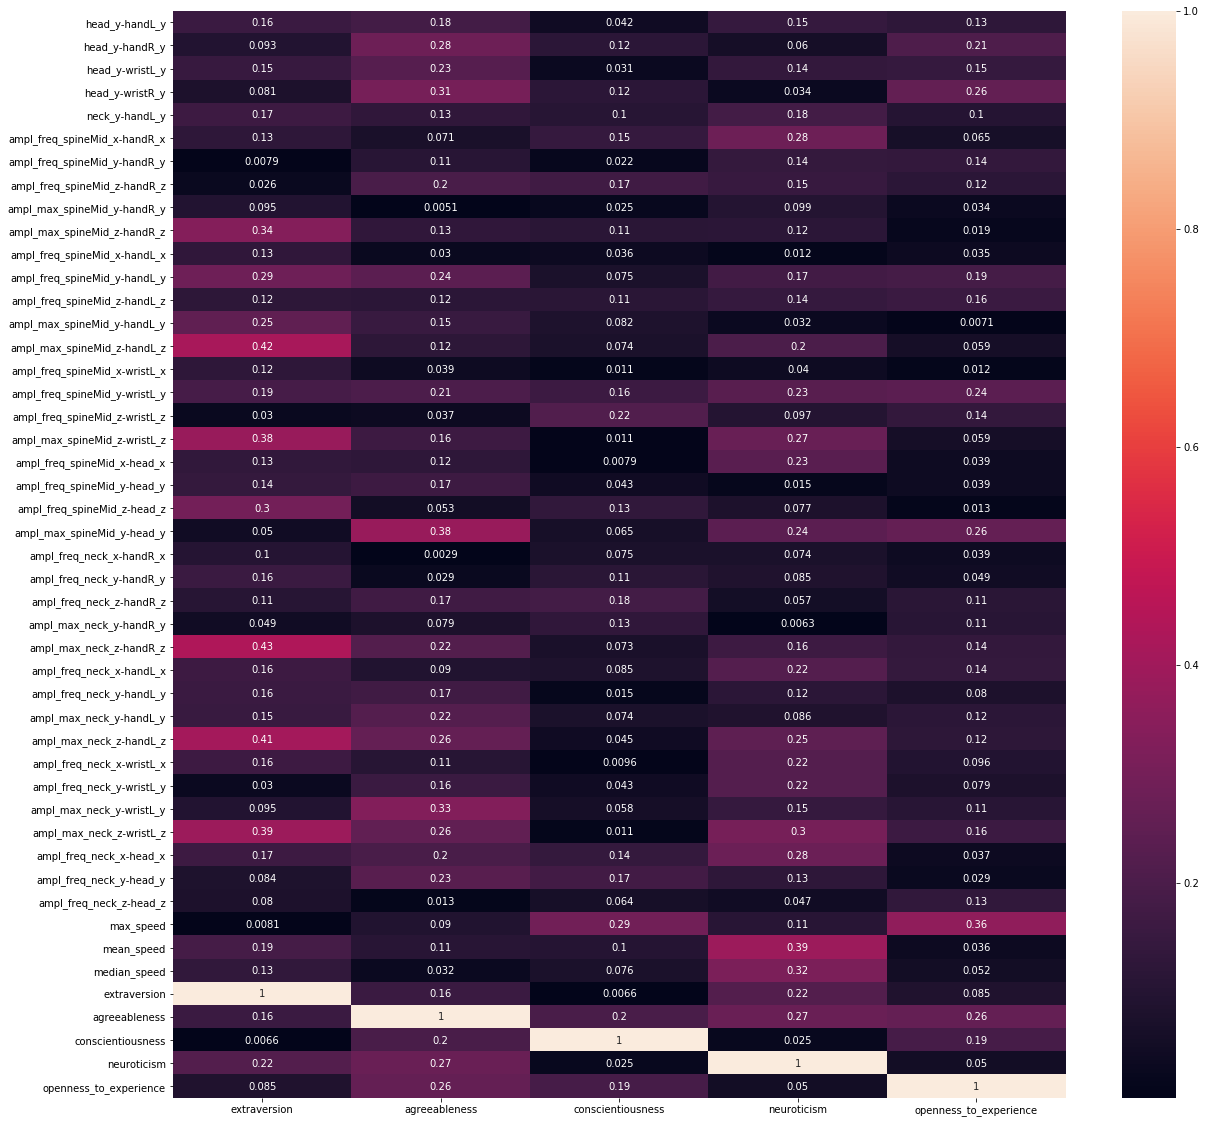

*****
task: 1
*****
extraversion                    1.000000
ampl_max_neck_z-wristL_z        0.351270
ampl_max_spineMid_z-wristL_z    0.342690
ampl_max_spineMid_z-handL_z     0.316076
ampl_max_neck_z-handL_z         0.312233
Name: extraversion, dtype: float64

agreeableness                 1.000000
neuroticism                   0.271874
openness_to_experience        0.262126
ampl_max_spineMid_y-head_y    0.253108
max_speed                     0.253095
Name: agreeableness, dtype: float64

conscientiousness               1.000000
ampl_max_neck_y-wristL_y        0.370896
ampl_freq_neck_x-handL_x        0.335393
ampl_freq_spineMid_x-handL_x    0.324504
ampl_max_spineMid_y-wristL_y    0.301688
Name: conscientiousness, dtype: float64

neuroticism                    1.000000
ampl_max_neck_z-handR_z        0.326468
ampl_max_spineMid_z-handR_z    0.290443
agreeableness                  0.271874
mean_speed                     0.258988
Name: neuroticism, dtype: float64

openness_to_experience    

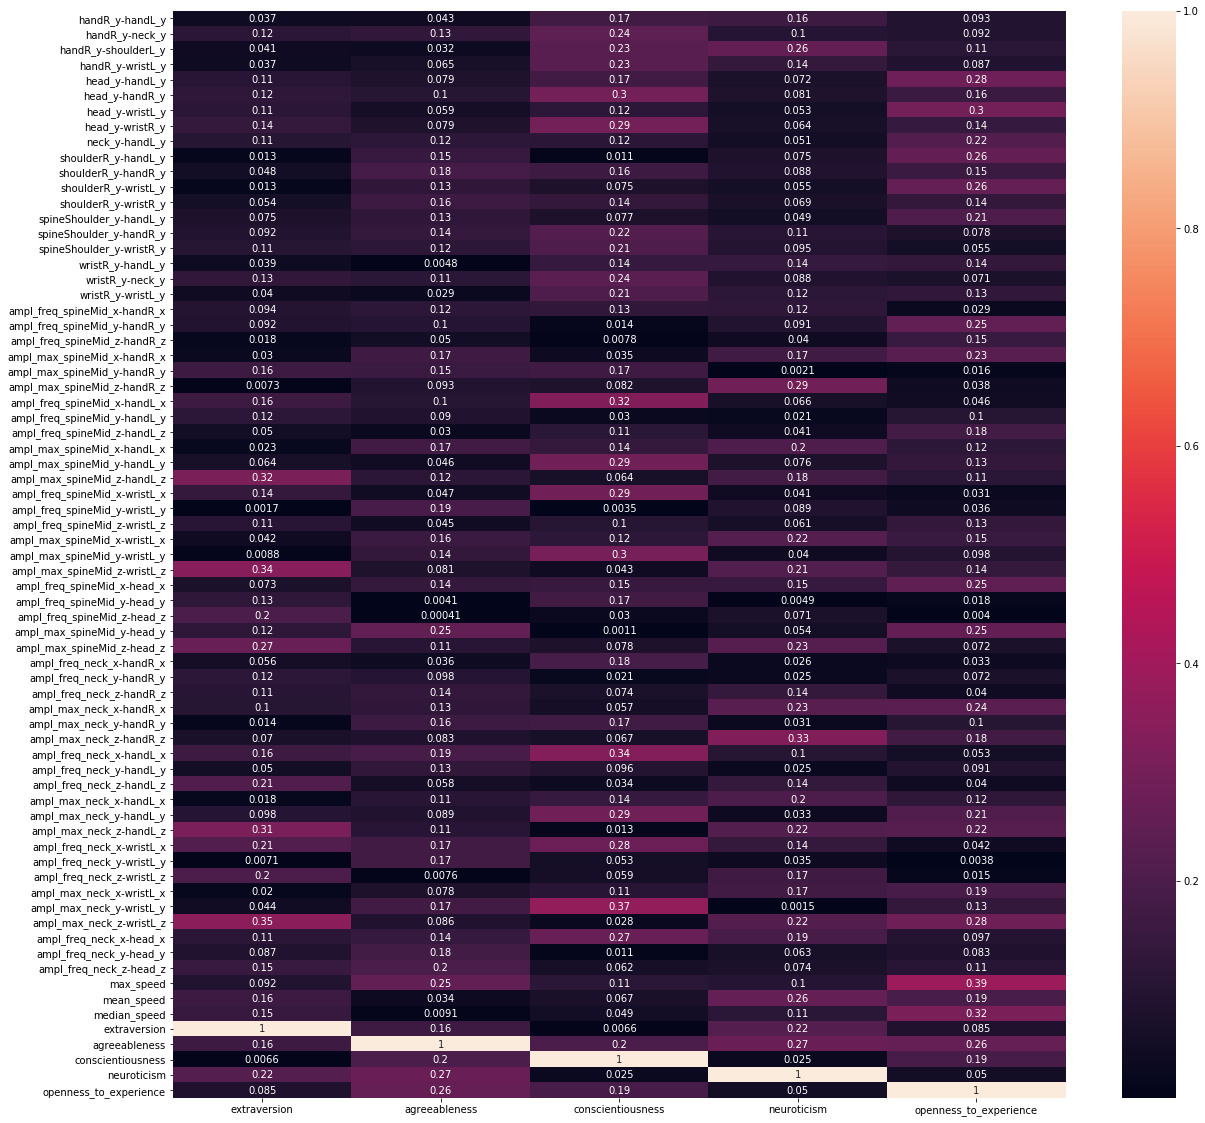

*****
task: 2
*****
extraversion                    1.000000
ampl_max_spineMid_y-handR_y     0.457923
ampl_freq_spineMid_z-head_z     0.389683
ampl_max_neck_y-handR_y         0.378516
ampl_max_spineMid_z-wristL_z    0.338858
Name: extraversion, dtype: float64

agreeableness                   1.000000
ampl_max_spineMid_z-wristL_z    0.408010
ampl_freq_neck_x-head_x         0.400101
ampl_max_spineMid_z-handL_z     0.390897
ampl_max_neck_z-wristL_z        0.343246
Name: agreeableness, dtype: float64

conscientiousness               1.000000
ampl_max_neck_z-handR_z         0.382503
ampl_max_spineMid_z-handR_z     0.358010
ampl_max_spineMid_y-handL_y     0.272215
ampl_freq_spineMid_z-handR_z    0.256418
Name: conscientiousness, dtype: float64

neuroticism                     1.000000
mean_speed                      0.468537
median_speed                    0.436714
ampl_freq_spineMid_y-handR_y    0.351971
ampl_freq_neck_y-handL_y        0.322856
Name: neuroticism, dtype: float64

openness_to

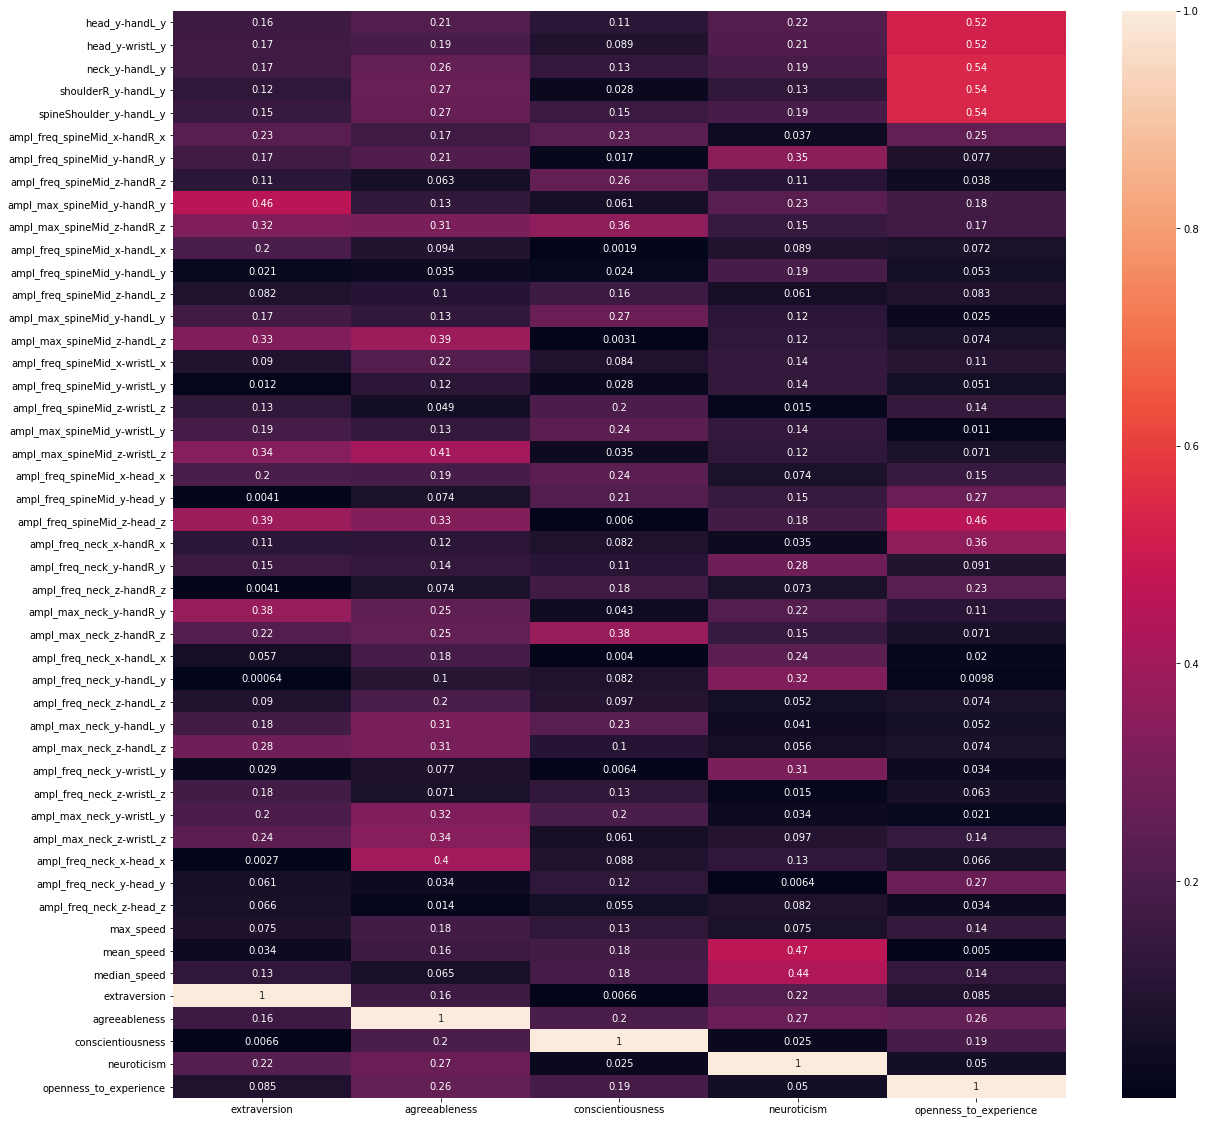

*****
task: 3
*****
extraversion                    1.000000
ampl_freq_spineMid_x-handR_x    0.386323
shoulderR_y-wristR_y            0.319542
ampl_max_spineMid_z-wristL_z    0.318862
head_y-wristR_y                 0.301476
Name: extraversion, dtype: float64

agreeableness                  1.000000
ampl_freq_spineMid_z-head_z    0.369594
ampl_freq_neck_z-head_z        0.323326
head_z-handR_z                 0.302290
ampl_max_spineMid_z-handR_z    0.272116
Name: agreeableness, dtype: float64

conscientiousness               1.000000
ampl_max_spineMid_z-handR_z     0.296776
ampl_freq_neck_y-wristL_y       0.293528
ampl_freq_neck_y-handL_y        0.268932
ampl_freq_spineMid_z-handR_z    0.249652
Name: conscientiousness, dtype: float64

neuroticism                    1.000000
ampl_freq_neck_y-handL_y       0.337681
head_y-elbowL_y                0.327253
head_y-elbowR_y                0.327253
ampl_freq_spineMid_z-head_z    0.302489
Name: neuroticism, dtype: float64

openness_to_experienc

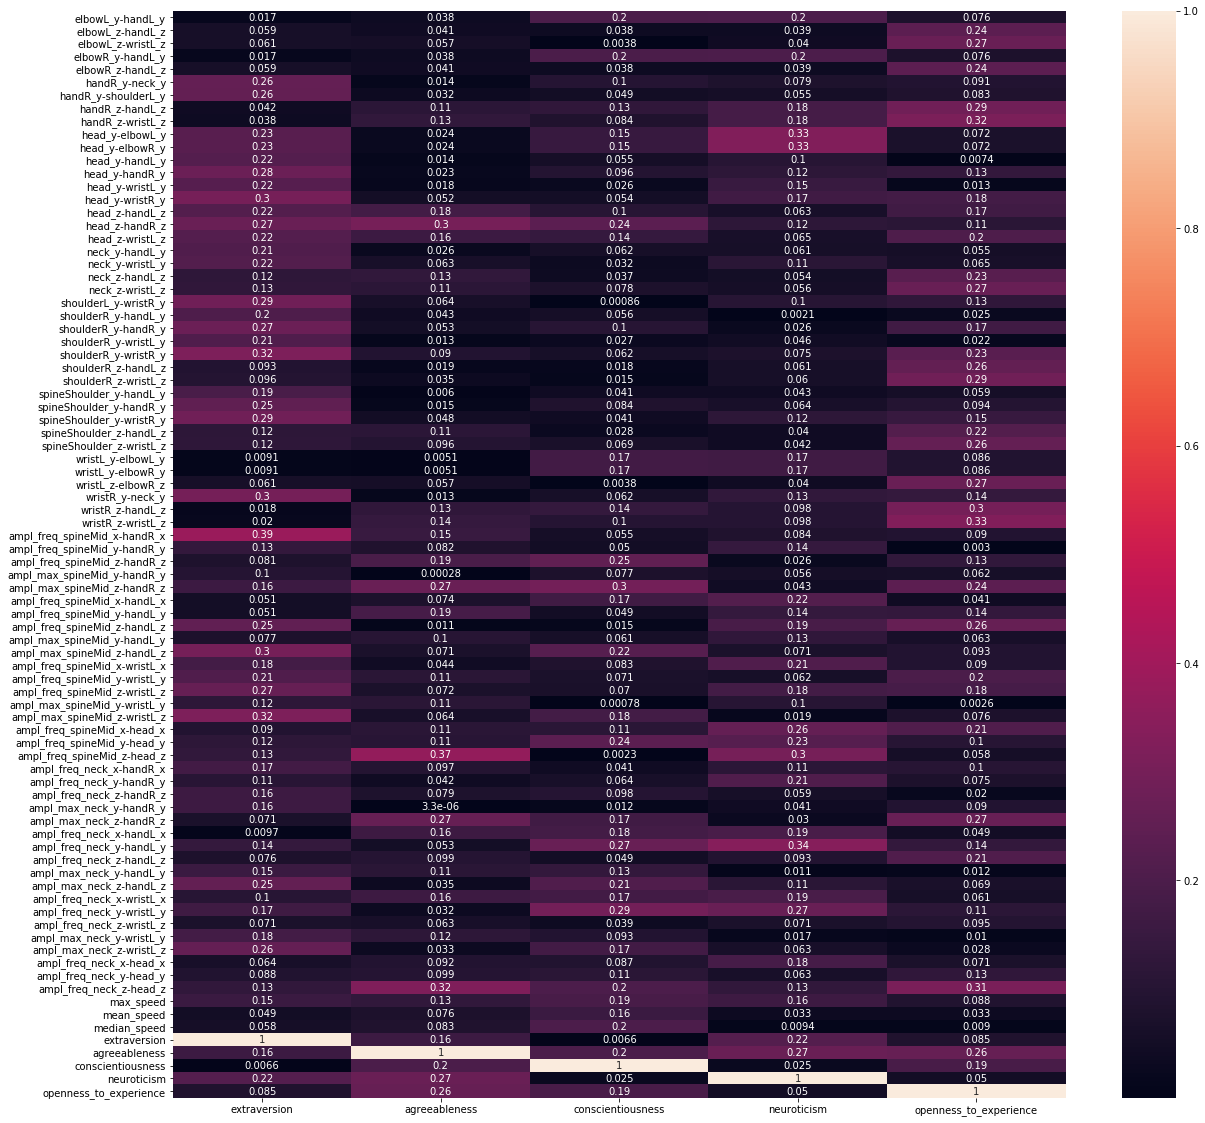

*****
task: 4
*****
extraversion                 1.000000
wristR_y-handL_y             0.298643
ampl_freq_neck_x-wristL_x    0.239117
handR_y-shoulderL_y          0.225615
ampl_max_neck_z-handR_z      0.225155
Name: extraversion, dtype: float64

agreeableness                    1.000000
ampl_freq_spineMid_x-handL_x     0.353258
ampl_freq_spineMid_x-wristL_x    0.332094
neuroticism                      0.271874
handR_y-neck_y                   0.263856
Name: agreeableness, dtype: float64

conscientiousness              1.000000
ampl_max_neck_y-handL_y        0.379250
ampl_max_neck_y-wristL_y       0.338062
ampl_mean_neck_y-handL_y       0.336585
ampl_freq_spineMid_z-head_z    0.329736
Name: conscientiousness, dtype: float64

neuroticism            1.000000
neck_y-handL_y         0.356713
shoulderR_y-handL_y    0.355502
head_y-handL_y         0.349000
elbowL_y-handL_y       0.343509
Name: neuroticism, dtype: float64

openness_to_experience          1.000000
ampl_max_spineMid_y-head_y    

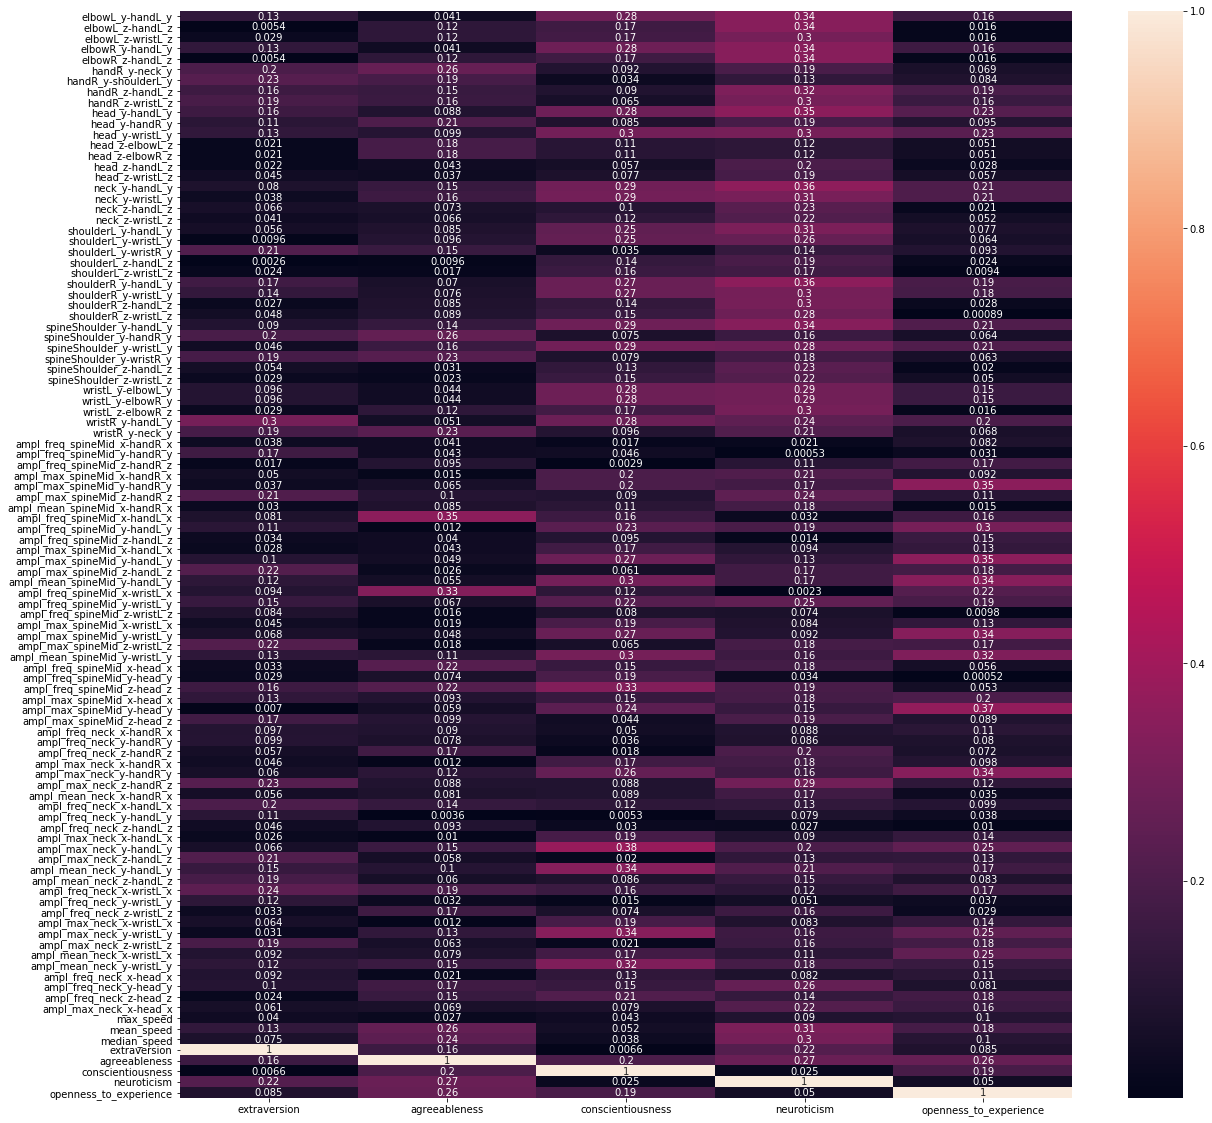

*****
task: 5
*****
extraversion                1.000000
spineShoulder_y-wristL_y    0.368668
neck_y-wristL_y             0.352659
spineShoulder_y-handL_y     0.351878
neck_y-handL_y              0.339572
Name: extraversion, dtype: float64

agreeableness                   1.000000
ampl_max_spineMid_x-handR_x     0.350501
shoulderL_y-handL_y             0.336971
ampl_freq_spineMid_z-handL_z    0.316766
ampl_freq_neck_z-handL_z        0.314624
Name: agreeableness, dtype: float64

conscientiousness               1.000000
ampl_freq_spineMid_y-handL_y    0.343040
ampl_freq_spineMid_x-handR_x    0.328318
max_speed                       0.275899
ampl_freq_neck_y-handL_y        0.274059
Name: conscientiousness, dtype: float64

neuroticism         1.000000
head_y-handL_y      0.302105
head_y-handR_y      0.300723
handR_y-elbowL_y    0.298723
handR_y-elbowR_y    0.298723
Name: neuroticism, dtype: float64

openness_to_experience           1.000000
ampl_freq_spineMid_y-wristL_y    0.311893
ampl_fr

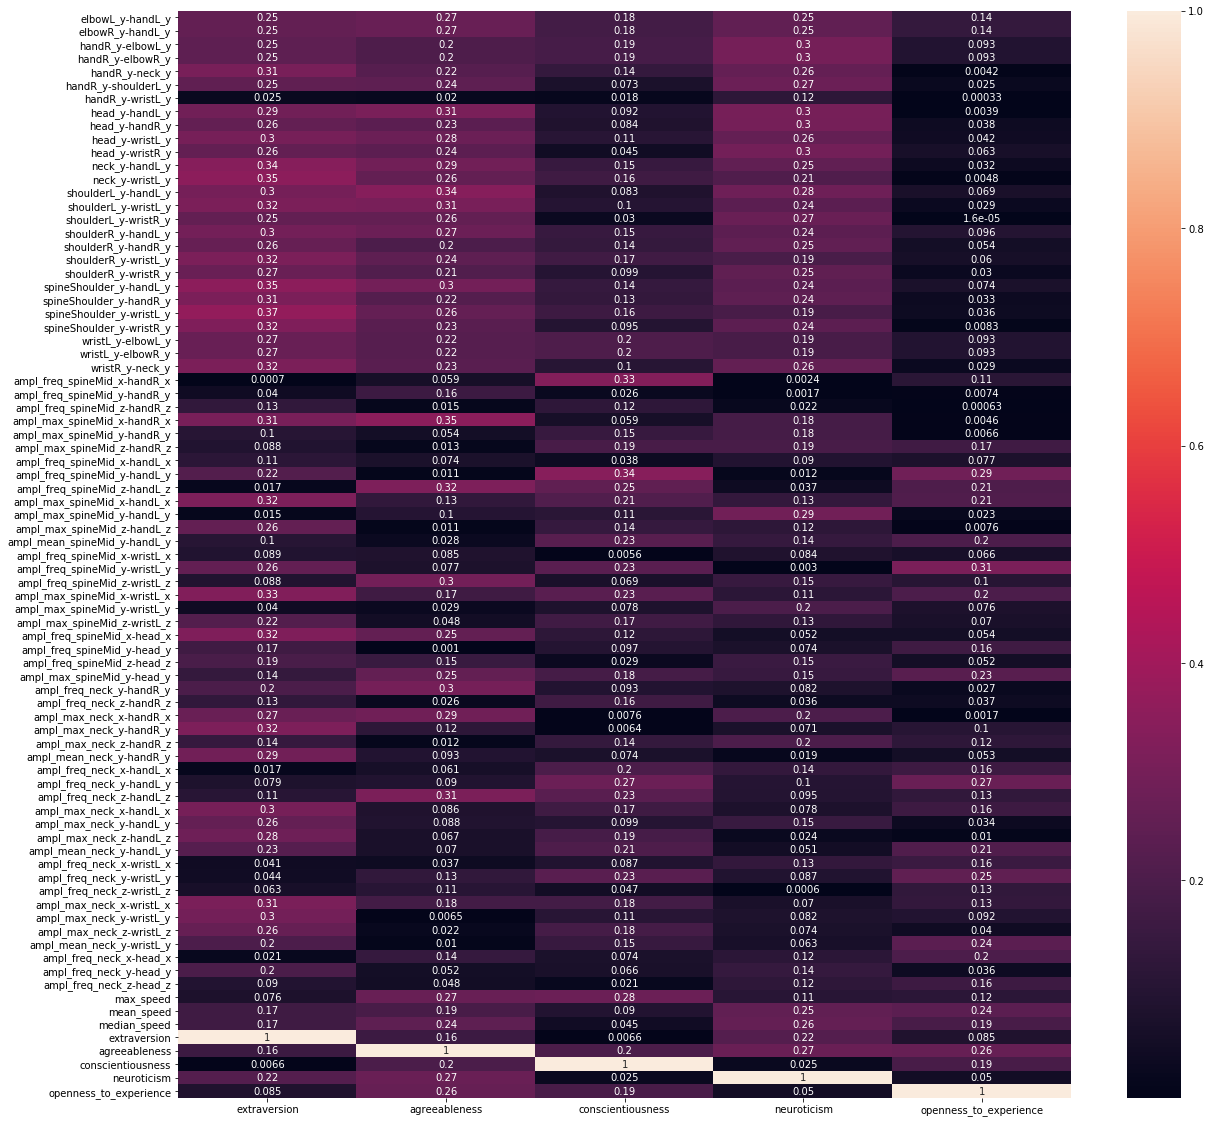

In [176]:
print '*'*5
print 'Absolute Value'
print '*'*5
print

fig=plt.figure(figsize=(20, 20))
for df in full_dfs:
    
    var_features = list(df.var().index[(df.var()>0.001).values])
    print '*'*5
    print 'task:', df['task'][0]
    print '*'*5
    for b in big5:
        print np.abs(df[var_features].corr()[b]).nlargest(n=5)
        print
    #print len(var_features)
    sns.heatmap(np.abs(df[var_features].corr()[big5]), annot=True)
    plt.show()
    fig=plt.figure(figsize=(20, 20))

In [178]:
import pickle
pickle.dump(full_dfs, open('../data/all_features_per_task.p', 'wb'))